# SMS Spam Collection Dataset

SMS spam classification with Natural Language Processing (NLP) entails creating a model that can automatically determine if a text message (SMS) is spam or not. NLP is an area of artificial intelligence that studies the interplay of computers and human language. The purpose of SMS spam categorization is to examine text messages' content and decide whether they are spam or authentic.

About Dataset:
The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

Content
The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

Sources : Kaggle
https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset


## Best practises 
1. Preprocessing and cleaning
2. Make train test split
3. Apply BOW,TF-IDF, Word2Vec
4. Train ML algorithms for classification

In [3]:
#import packages

import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

#data visualization
import matplotlib.pyplot as plt

#Performance metrics
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,accuracy_score,classification_report,\
            precision_score,recall_score,f1_score


In [4]:
#load the dataset 
messages=pd.read_csv('SMSSpamCollection',
                    sep='\t',names=["label","message"])

In [5]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
messages.shape

(5572, 2)

In [7]:
#check for missing values 
messages.isnull().sum()

label      0
message    0
dtype: int64

In [8]:
#check for types of ratings
messages['label'].unique()

array(['ham', 'spam'], dtype=object)

In [9]:
#check for class balance
messages['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

### Preprocessing & Cleaning


In [11]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akush\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [13]:
#initialize the lemmatizer
lemmatizer=WordNetLemmatizer()

In [14]:
corpus=[]
for i in range(0,len(messages)):
    review=re.sub('[^a-zA-z]',' ',messages['message'][i])
    review=review.lower()
    review=review.split()
    review=[lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=' '.join(review)
    corpus.append(review)

In [15]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [16]:
#output feature
y = pd.get_dummies(messages['label'], drop_first=True).values.ravel() 

In [24]:
y=y.astype(int)

In [25]:
y.shape

(5572,)

In [26]:
y

array([0, 0, 1, ..., 0, 0, 0])

### train test split 

In [28]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus,y,test_size=0.20)

In [29]:
len(X_train),len(y_train)

(4457, 4457)

### Applying the Bag of words

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
#initialize the vectorizer
bow=CountVectorizer(max_features=2500,ngram_range=(1,2))

In [36]:
X_train= bow.fit_transform(X_train).toarray()
X_test= bow.transform(X_test).toarray()

In [37]:
np.unique(X_train)

array([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 15, 18], dtype=int64)

In [38]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [39]:
len(X_train),len(y_train)

(4457, 4457)

In [40]:
y_test

array([0, 0, 1, ..., 0, 0, 1])

In [41]:
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
X_train

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

In [42]:
bow.vocabulary_

{'please': 1587,
 'leave': 1118,
 'sorry': 1945,
 'telling': 2080,
 'hi': 917,
 'think': 2117,
 'match': 1255,
 'ok': 1476,
 'take': 2058,
 'care': 285,
 'umma': 2226,
 'ok take': 1484,
 'take care': 2059,
 'booked': 187,
 'ticket': 2133,
 'pongal': 1620,
 'work': 2427,
 'slave': 1905,
 'look': 1180,
 'month': 1347,
 'sha': 1863,
 'co': 349,
 'yeah': 2474,
 'baby': 129,
 'well': 2373,
 'sound': 1951,
 'important': 996,
 'understand': 2231,
 'darlin': 465,
 'give': 787,
 'ring': 1757,
 'later': 1094,
 'fone': 702,
 'love': 1198,
 'kate': 1055,
 'love kate': 1200,
 'free': 716,
 'st': 1975,
 'week': 2364,
 'entry': 610,
 'textpod': 2102,
 'chance': 308,
 'win': 2396,
 'gb': 763,
 'ipod': 1024,
 'cash': 292,
 'every': 623,
 'wk': 2413,
 'txt': 2206,
 'www': 2450,
 'net': 1410,
 'custcare': 449,
 'free st': 726,
 'st week': 1977,
 'chance win': 309,
 'gb ipod': 764,
 'cash every': 295,
 'every wk': 626,
 'wk txt': 2414,
 'per': 1544,
 'min': 1295,
 'call': 234,
 'bt': 212,
 'line': 1151,
 

# Modelling

In [44]:
from sklearn.naive_bayes import MultinomialNB

In [45]:
#instantiate the model and #fit the model
spam_detect_model= MultinomialNB().fit(X_train,y_train)

In [46]:
#make predictions
y_pred=spam_detect_model.predict(X_test)

In [47]:
print(f"Bow Accuracy: {accuracy_score(y_pred, y_test):.4f}%")

Bow Accuracy: 0.9874%


In [48]:
### BOW Performance

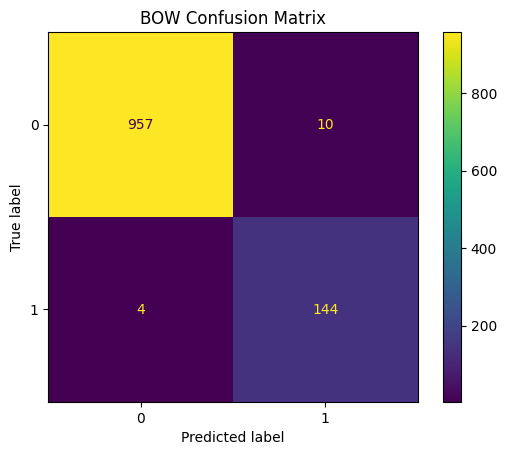

In [49]:
#confusion Matrix
cm=confusion_matrix(y_pred, y_test,labels=spam_detect_model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=spam_detect_model.classes_)
disp.plot()
plt.title('BOW Confusion Matrix')
plt.show()

In [50]:
def make_results(model_name, model_object, X_test, y_test):
    # Get predictions
    y_pred = model_object.predict(X_test)

    # Extract accuracy and precision
    precision = precision_score(y_test, y_pred) 
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

     #put all the in data frame
    table = pd.DataFrame()

    #push all scores in table varible
    table= pd.DataFrame({'Model':[model_name],
                        'F1':[f1],
                        'Recall':[recall],
                        'Precision':[precision],
                        'Accuracy':[accuracy]
                        })

    return table


In [51]:
MultinomialNB_results1 = make_results('MultinomialNB', spam_detect_model, X_test, y_test)
MultinomialNB_results1

,Model,F1,Recall,Precision,Accuracy
0,MultinomialNB,0.953642,0.935065,0.972973,0.987444


# Modelling 

In [53]:
from sklearn.naive_bayes import MultinomialNB

In [54]:
#instantiate the model and #fit the model
spam_tfidf_model= MultinomialNB().fit(X_train,y_train)

In [55]:
#make predictions
y_pred=spam_tfidf_model.predict(X_test)

In [56]:
print(f"IF-IDF Accuracy: {accuracy_score(y_pred, y_test):.4f}%")

IF-IDF Accuracy: 0.9874%


### TF-IDF Performance

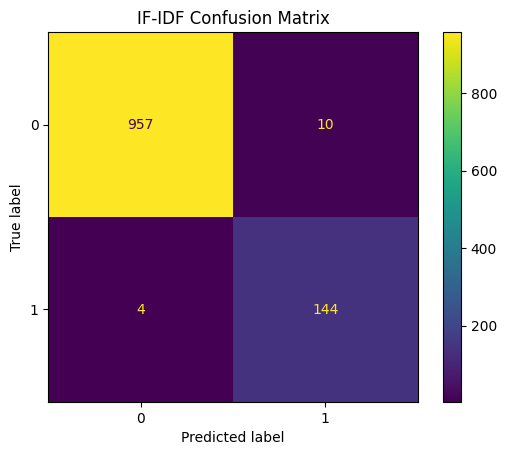

In [58]:
#confusion Matrix
cm=confusion_matrix(y_pred, y_test,labels=spam_tfidf_model.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=spam_tfidf_model.classes_)
disp.plot()
plt.title('IF-IDF Confusion Matrix')
plt.show()

In [59]:
MultinomialNB_results2 = make_results('MultinomialNB2', spam_tfidf_model, X_test, y_test)
MultinomialNB_results2


,Model,F1,Recall,Precision,Accuracy
0,MultinomialNB2,0.953642,0.935065,0.972973,0.987444


In [60]:
MultinomialNB_results = pd.concat([MultinomialNB_results2, MultinomialNB_results1])
MultinomialNB_results = MultinomialNB_results.sort_values(by='Accuracy', ascending=False)
MultinomialNB_results = MultinomialNB_results.reset_index(drop=True)
MultinomialNB_results

,Model,F1,Recall,Precision,Accuracy
0,MultinomialNB2,0.953642,0.935065,0.972973,0.987444
1,MultinomialNB,0.953642,0.935065,0.972973,0.987444


### Applying the Word2Vec and Average Word2Vec

In [62]:
import gensim
from gensim.models import Word2Vec, KeyedVectors

In [63]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

##### This time lets do something different we will we use lemmatizer but not limit the stop words.So there are 2 ways to do it.

In [65]:
corpus = []
for i in range(len(messages)):
    review = re.sub(r'[^a-zA-Z0-9-]', ' ', messages['message'][i])  # Remove special chars
    review = review.lower().strip()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)

    # If the processed review is empty, replace it with "empty_message" or the original text
    corpus.append(review if review else "empty_message")  


In [66]:
corpus

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s',
 'u dun say so early hor u c already then say',
 'nah i don t think he go to usf he life around here though',
 'freemsg hey there darling it s been 3 week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send 1 50 to rcv',
 'even my brother is not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam ha been set a your callertune for all caller press 9 to copy your friend callertune',
 'winner a a valued network customer you have been selected to receivea 900 prize reward to claim call 09061701461 claim code kl341 valid 12 hour only',
 'had your mobile 11 month or more u r entitled to update to th

In [67]:
len(corpus)

5572

## WAY 2 to lower the case is use of simple_preprocess

In [69]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

In [70]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))


In [71]:
len(words)

5572

In [72]:
words

[['go',
  'until',
  'jurong',
  'point',
  'crazy',
  'available',
  'only',
  'in',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'there',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'in',
  'wkly',
  'comp',
  'to',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'to',
  'to',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply',
  'over'],
 ['dun', 'say', 'so', 'early', 'hor', 'already', 'then', 'say'],
 ['nah',
  'don',
  'think',
  'he',
  'go',
  'to',
  'usf',
  'he',
  'life',
  'around',
  'here',
  'though'],
 ['freemsg',
  'hey',
  'there',
  'darling',
  'it',
  'been',
  'week',
  'now',
  'and',
  'no',
  'word',
  'back',
  'like',
  'some',
  'fun',
  'you',
  'up',
  'for',
  'it',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'to',
  'send',
  'to',
  'rcv'],
 ['even',
  'my',
  'brother',
  'is',
  'not',
  'like',
  'to',
  'spea

In [73]:
len(words)   ### I am losing 1 record. I have to fix this 

5572

In [74]:
#checking for the missing record
[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus, messages['message']) if i<1]

[]

In [75]:
#these len's should be same
print(len(corpus) == len(messages))  # Should be True
print(len(corpus) == len(words))  # Should be True

True
True


## Lets train Word2vec from scratch

In [77]:
model=gensim.models.Word2Vec(sentences=words,vector_size=100)

In [78]:
## To Get All the Vocabulary
model.wv.index_to_key

['to',
 'you',
 'the',
 'it',
 'and',
 'in',
 'is',
 'me',
 'my',
 'for',
 'your',
 'call',
 'of',
 'that',
 'have',
 'on',
 'now',
 'are',
 'can',
 'so',
 'but',
 'not',
 'or',
 'we',
 'do',
 'get',
 'at',
 'ur',
 'will',
 'if',
 'be',
 'with',
 'no',
 'just',
 'this',
 'gt',
 'lt',
 'go',
 'how',
 'up',
 'when',
 'ok',
 'what',
 'free',
 'day',
 'from',
 'all',
 'out',
 'know',
 'll',
 'come',
 'like',
 'good',
 'time',
 'am',
 'then',
 'got',
 'wa',
 'there',
 'he',
 'text',
 'love',
 'only',
 'want',
 'send',
 'need',
 'one',
 'txt',
 'today',
 'by',
 'going',
 'don',
 'stop',
 'home',
 'she',
 'about',
 'lor',
 'sorry',
 'see',
 'still',
 'mobile',
 'take',
 'back',
 'da',
 'our',
 'reply',
 'dont',
 'think',
 'tell',
 'week',
 'phone',
 'hi',
 'they',
 'new',
 'later',
 'please',
 'her',
 'any',
 'ha',
 'pls',
 'co',
 'did',
 'been',
 'msg',
 'an',
 'some',
 'dear',
 'make',
 'night',
 'who',
 'here',
 'say',
 'well',
 'message',
 'where',
 're',
 'min',
 'thing',
 'much',
 'clai

In [79]:
#check the vocabulary size
model.corpus_count

5572

In [80]:
#how many epochs the model took for training
model.epochs

5

In [81]:
#to check how many iterations model took in 5 epochs
total_iterations = model.corpus_count * model.epochs
print(f"Total iterations: {total_iterations}")

Total iterations: 27860


In [82]:
# i picked a word from my words list and I will try to see how many similar words model can tell me
model.wv.similar_by_word('good')

[('wa', 0.9989137649536133),
 ('about', 0.9984347224235535),
 ('morning', 0.9983730316162109),
 ('here', 0.9983481168746948),
 ('well', 0.9982589483261108),
 ('there', 0.9982112050056458),
 ('in', 0.998192548751831),
 ('got', 0.9981666207313538),
 ('same', 0.9981353878974915),
 ('where', 0.9981200695037842)]

In [83]:
#to check vector size of word 'good'
model.wv['good']

array([-0.353, 0.345, 0.259, 0.108, 0.157, -0.61, 0.265, 0.809, -0.391, -0.178, -0.362, -0.612, -0.165, 0.194, 0.202, -0.179, 0.0935, -0.482, -0.181, -0.713, 0.274, 0.259, 0.28, -0.307, 0.0383, 0.00802, -0.38, -0.211, -0.444, 0.126, 0.441, -0.0663, 0.34, -0.414, -0.283, 0.431, 0.113, -0.248, -0.128, -0.617, 0.168, -0.396, -0.265, 0.0375, 0.217, -0.13, -0.34, -0.215, 0.216, 0.194, 0.253, -0.324, -0.158, -0.0148, -0.262, 0.344, 0.361, 0.0683, -0.43, 0.195, -0.00664, 0.124, -0.0873, -0.155, -0.415, 0.441, 0.228, 0.361, -0.513, 0.453, -0.263, 0.215, 0.473, -0.145, 0.456, 0.193, 0.152, -0.196, -0.187, 0.00999, -0.198, -0.0572, -0.365, 0.54, -0.223, -0.0288, 0.0941, 0.255, 0.493, 0.0445, 0.455, 0.328, 0.0896, 0.0662, 0.545, 0.406, 0.203, -0.305, 0.0834, -0.108], dtype=float32)

In [84]:
#lets see its shape----they are 100
model.wv['good'].shape

(100,)

### Apply Average Word2Vec

In [86]:
def avg_word2vec(doc):   
    # take word2vec of word---- for word in doc if word is in model vocabulary
    # take mean of all word for all rows axis =0
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

In [87]:
#tqdm is a Python library used to display progress bars in loops, making it easier to track long-running tasks.
from tqdm import tqdm

In [88]:
X=[]
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i]))

100%|████████████████████████████████████████████████████████████████████████████| 5572/5572 [00:00<00:00, 5583.90it/s]


In [89]:
X

[array([-0.241, 0.217, 0.185, 0.0727, 0.128, -0.452, 0.165, 0.566, -0.263, -0.128, -0.237, -0.408, -0.136, 0.133, 0.154, -0.1, 0.0554, -0.337, -0.112, -0.483, 0.159, 0.172, 0.179, -0.212, -0.00455, 0.0123, -0.257, -0.151, -0.294, 0.0937, 0.305, -0.0405, 0.222, -0.279, -0.213, 0.29, 0.0855, -0.189, -0.0999, -0.422, 0.134, -0.279, -0.212, 0.0309, 0.142, -0.0875, -0.238, -0.122, 0.158, 0.134, 0.159, -0.207, -0.0791, 0.00755, -0.2, 0.239, 0.239, 0.0299, -0.281, 0.132, -0.00669, 0.0937, -0.0531, -0.101, -0.273, 0.3, 0.149, 0.224, -0.355, 0.316, -0.194, 0.149, 0.305, -0.123, 0.315, 0.138, 0.0589, -0.0995, -0.135, -0.0223, -0.135, -0.0354, -0.254, 0.376, -0.133, 0.0145, 0.0679, 0.192, 0.346, 0.0252, 0.324, 0.225, 0.0348, 0.0451, 0.36, 0.267, 0.101, -0.247, 0.0715, -0.0615], dtype=float32),
 array([-0.215, 0.201, 0.161, 0.0619, 0.12, -0.4, 0.14, 0.487, -0.226, -0.107, -0.207, -0.359, -0.114, 0.119, 0.137, -0.0967, 0.0548, -0.295, -0.102, -0.434, 0.134, 0.15, 0.147, -0.183, -0.00463, 0.0065, -0

In [90]:
len(X)

5572

In [91]:
##independent Features
X_new = np.array([np.array(x) for x in X], dtype=object)


In [92]:
X_new.shape

(5572,)

In [93]:
X_new[0]

array([-0.241, 0.217, 0.185, 0.0727, 0.128, -0.452, 0.165, 0.566, -0.263, -0.128, -0.237, -0.408, -0.136, 0.133, 0.154, -0.1, 0.0554, -0.337, -0.112, -0.483, 0.159, 0.172, 0.179, -0.212, -0.00455, 0.0123, -0.257, -0.151, -0.294, 0.0937, 0.305, -0.0405, 0.222, -0.279, -0.213, 0.29, 0.0855, -0.189, -0.0999, -0.422, 0.134, -0.279, -0.212, 0.0309, 0.142, -0.0875, -0.238, -0.122, 0.158, 0.134, 0.159, -0.207, -0.0791, 0.00755, -0.2, 0.239, 0.239, 0.0299, -0.281, 0.132, -0.00669, 0.0937, -0.0531, -0.101, -0.273, 0.3, 0.149, 0.224, -0.355, 0.316, -0.194, 0.149, 0.305, -0.123, 0.315, 0.138, 0.0589, -0.0995, -0.135, -0.0223, -0.135, -0.0354, -0.254, 0.376, -0.133, 0.0145, 0.0679, 0.192, 0.346, 0.0252, 0.324, 0.225, 0.0348, 0.0451, 0.36, 0.267, 0.101, -0.247, 0.0715, -0.0615], dtype=float32)

In [94]:
X_new[0].shape

(100,)

In [95]:
#checking how to apply reshape full data X
X[0].reshape(1,-1).shape

(1, 100)

In [96]:
## this is the final independent features

df_list = []  

for i in range(len(X)):
    df_list.append(pd.DataFrame(X[i].reshape(1, -1)))  # Convert each row to DataFrame

# Concatenate all stored DataFrames at once
df = pd.concat(df_list, ignore_index=True)


In [97]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.240931,0.216809,0.185080,0.072715,0.128262,-0.451895,0.164614,0.565777,-0.263026,-0.127850,...,0.324235,0.224534,0.034751,0.045092,0.359525,0.266994,0.101363,-0.247065,0.071497,-0.061533
1,-0.215359,0.200532,0.161080,0.061941,0.120035,-0.399507,0.140178,0.487325,-0.226435,-0.107448,...,0.284804,0.188670,0.024347,0.041739,0.307946,0.235351,0.081598,-0.224590,0.061239,-0.050527
2,-0.233431,0.206537,0.195290,0.099898,0.137208,-0.507815,0.153193,0.595736,-0.283999,-0.134616,...,0.349347,0.234673,0.001092,0.062168,0.373795,0.278947,0.046183,-0.285213,0.106177,-0.045239
3,-0.334508,0.306953,0.249020,0.093195,0.178593,-0.608094,0.223399,0.756944,-0.356468,-0.173733,...,0.428739,0.296030,0.041121,0.064186,0.472164,0.354073,0.149629,-0.330712,0.085840,-0.082844
4,-0.287069,0.247844,0.216965,0.073913,0.153881,-0.508694,0.188129,0.649654,-0.306631,-0.153167,...,0.370219,0.243727,0.044724,0.052865,0.405534,0.303951,0.121619,-0.285498,0.068213,-0.078705


In [98]:
#give y outcome variable a name
df['Output']=y

In [99]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Output
0,-0.240931,0.216809,0.185080,0.072715,0.128262,-0.451895,0.164614,0.565777,-0.263026,-0.127850,...,0.224534,0.034751,0.045092,0.359525,0.266994,0.101363,-0.247065,0.071497,-0.061533,0
1,-0.215359,0.200532,0.161080,0.061941,0.120035,-0.399507,0.140178,0.487325,-0.226435,-0.107448,...,0.188670,0.024347,0.041739,0.307946,0.235351,0.081598,-0.224590,0.061239,-0.050527,0
2,-0.233431,0.206537,0.195290,0.099898,0.137208,-0.507815,0.153193,0.595736,-0.283999,-0.134616,...,0.234673,0.001092,0.062168,0.373795,0.278947,0.046183,-0.285213,0.106177,-0.045239,1
3,-0.334508,0.306953,0.249020,0.093195,0.178593,-0.608094,0.223399,0.756944,-0.356468,-0.173733,...,0.296030,0.041121,0.064186,0.472164,0.354073,0.149629,-0.330712,0.085840,-0.082844,0
4,-0.287069,0.247844,0.216965,0.073913,0.153881,-0.508694,0.188129,0.649654,-0.306631,-0.153167,...,0.243727,0.044724,0.052865,0.405534,0.303951,0.121619,-0.285498,0.068213,-0.078705,0


In [100]:
#check for null in dataframe
df.isnull().sum()

0         15
1         15
2         15
3         15
4         15
          ..
96        15
97        15
98        15
99        15
Output     0
Length: 101, dtype: int64

In [101]:
#drop the nulls
df.dropna(inplace=True)

In [102]:
#recheck for nulls
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
         ..
96        0
97        0
98        0
99        0
Output    0
Length: 101, dtype: int64

In [103]:
## Independent Feature
X=df

In [104]:
X.shape

(5557, 101)

In [105]:
X.columns = X.columns.astype(str)

In [106]:
type(X)

pandas.core.frame.DataFrame

In [107]:
y.shape

(5572,)

In [108]:
## output feature
y=df['Output']

# Modelling

In [185]:
## Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [187]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Output
4274,-0.269506,0.239055,0.207645,0.074280,0.141256,-0.496388,0.174135,0.622662,-0.288244,-0.142238,...,0.239765,0.039160,0.048188,0.392324,0.297342,0.107075,-0.272267,0.078303,-0.065610,0
5118,-0.272153,0.238322,0.212628,0.056075,0.160517,-0.487224,0.160642,0.615322,-0.300472,-0.166221,...,0.211221,0.034945,0.043037,0.367907,0.282689,0.104780,-0.275097,0.056819,-0.058068,0
4379,-0.278801,0.249738,0.212027,0.073079,0.155963,-0.497658,0.176666,0.624350,-0.296183,-0.139899,...,0.236101,0.031869,0.048283,0.385466,0.288601,0.117588,-0.274821,0.066786,-0.062693,0
2478,-0.304338,0.269981,0.227633,0.071348,0.167885,-0.539259,0.193806,0.696898,-0.327052,-0.165674,...,0.259770,0.053512,0.049531,0.431536,0.326273,0.135341,-0.296106,0.070938,-0.081504,0
1579,-0.070172,0.361475,0.134993,0.224367,-0.203326,-0.416550,0.497185,0.827969,-0.268823,-0.139435,...,0.580278,0.339795,0.157577,0.663151,0.437051,0.397113,0.071185,0.063838,-0.275958,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
934,-0.323902,0.281501,0.236734,0.062710,0.181532,-0.559119,0.200107,0.724188,-0.335838,-0.182570,...,0.253705,0.055665,0.049769,0.439588,0.336690,0.142315,-0.309939,0.050164,-0.084982,0
128,-0.341032,0.300252,0.249182,0.050766,0.183373,-0.571194,0.220040,0.756551,-0.359085,-0.198602,...,0.274996,0.072724,0.040247,0.467840,0.355420,0.165763,-0.309817,0.052706,-0.095011,0
5225,-0.261946,0.236555,0.202017,0.067289,0.142668,-0.482018,0.174108,0.612163,-0.283523,-0.139188,...,0.236900,0.043059,0.042930,0.388589,0.292931,0.110269,-0.265281,0.067202,-0.070481,0
3434,-0.299727,0.282041,0.238590,0.084487,0.158033,-0.564606,0.208260,0.706126,-0.327792,-0.161131,...,0.285887,0.054140,0.051968,0.458277,0.345310,0.136197,-0.299286,0.096283,-0.077240,0


In [189]:
y_train

4274    0
5118    0
4379    0
2478    0
1579    0
       ..
934     0
128     0
5225    0
3434    0
2089    1
Name: Output, Length: 4445, dtype: int32

### I have decided to use Random Forest. Here is why?

####  Robust Ensemble Approach
Random Forest is an ensemble of multiple decision trees. It tends to handle noise and outliers better than a single decision tree, making it robust for text data that can be quite diverse.
####  Good at Handling High-Dimensional Data
When we vectorize text (e.g., using TF-IDF or CountVectorizer), we may end up with many features—often thousands. Random Forest naturally handles high dimensionality by distributing importance across multiple trees.
####  Probability Outputs
Random Forest can provide class probabilities by calculating the proportion of trees that vote for a particular class. This is especially helpful in spam detection, where we might want a threshold-based approach to classify or flag emails.
####  Ease of Hyperparameter Tuning
With parameters like `n_estimators`, `max_depth`, and `min_samples_split`, we can significantly improve performance through methods like GridSearch or RandomizedSearch. This lets us tailor the model to specific dataset and hardware constraints.
#### Strong Baseline
Random Forest is often considered a strong general-purpose baseline for classification tasks. Even in text classification, it can perform competitively with simpler linear models (e.g., Logistic Regression or Naive Bayes), though specialized NLP models like LSTMs or Transformers (e.g., BERT) may offer higher accuracy with more complexity.
#### Feature Importance Insights
Although feature importance in high-dimensional data can be less interpretable, Random Forests still allow you to see which n-grams or terms are most influential for spam detection.


# Model 1: Random Forest

In [192]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [317]:
#instantiate the model
rf = RandomForestClassifier(random_state=0)

#declare hyper parameters
cv_params = {'max_depth': [2,3,None], 
             'max_features': [2],
             'n_estimators': [50, 100]
             }  

#delare metrics 
scoring = {'accuracy': 'accuracy',
           'precision': 'precision',
           'recall': 'recall',
           'f1': 'f1'}

#instantiate the grid search
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='accuracy')

In [319]:
%%time
#fit the model
rf_cv.fit(X_train, y_train)

CPU times: total: 14.1 s
Wall time: 15.1 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, None], 'max_features': [2],
                         'n_estimators': [50, 100]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [321]:
#pickle the model
import pickle

In [323]:
# Define a path to the folder where you want to save the model
path ="C:/Users/akush/Documents/Machine Learning/Udemy Course/26-CompleteNLP For Machine Learning/Practicals/"

In [325]:
# Pickle the model
#with open(path+'rf_cv_model.pickle','wb') as to_write:
    #pickle.dump(rf_cv,to_write)

In [329]:
# Read in pickled model
with open(path + 'rf_cv_model.pickle', 'rb') as to_read:
    rf_cv = pickle.load(to_read)

In [331]:
#lets find the best params
rf_cv.best_params_

{'max_depth': None, 'max_features': 2, 'n_estimators': 100}

In [333]:
#let find the best score
rf_cv.best_score_

0.9763779527559056

In [335]:
rf_cv.cv_results_

{'mean_fit_time': array([0.243, 0.426, 0.246, 0.476, 0.41, 0.881]),
 'std_fit_time': array([0.0711, 0.0258, 0.0243, 0.0229, 0.0171, 0.0424]),
 'mean_score_time': array([0.017, 0.0237, 0.0156, 0.0222, 0.0226, 0.0292]),
 'std_score_time': array([0.0036, 0.00426, 0.00183, 0.00292, 0.00585, 0.0044]),
 'param_max_depth': masked_array(data=[2, 2, 3, 3, None, None],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=[2, 2, 2, 2, 2, 2],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100, 50, 100],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'params': [{'max_depth': 2, 'max_features': 2, 'n_estimators': 50},
  {'max_depth': 2, 'max_features': 2, 'n_estimators': 100},
  {'max_depth': 3, 'max_features': 2, 'n_estimators': 50},
  {'max_depth': 3, 'ma

In [337]:
#make predictions
y_pred=rf_cv.predict(X_test)

### RandomForestClassifier Performance

<Figure size 300x300 with 0 Axes>

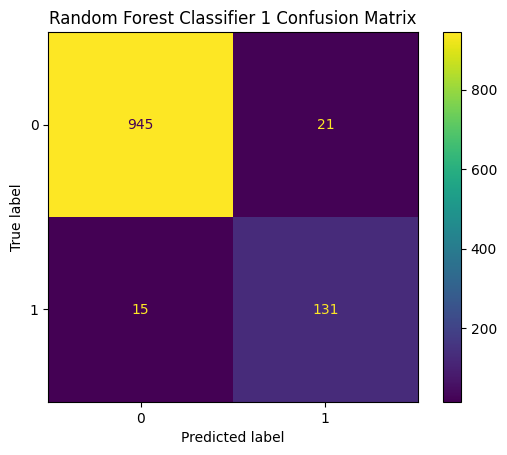

In [340]:
#confusion Matrix
plt.figure(figsize=(3,3))
cm=confusion_matrix(y_pred, y_test,labels=rf_cv.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_cv.classes_)
disp.plot()
plt.title('Random Forest Classifier 1 Confusion Matrix')
plt.show()

In [215]:
# lets a data frame of results of all models

In [283]:
def make_results(model_name,model_object):
    
    #find the cv_results for the model and put in a data frame
    cv_results = pd.DataFrame(model_object.cv_results_)

    #find the index of the mean_test_f1 and pull all columns
    best_estimator_results = cv_results.iloc[cv_results['mean_test_accuracy'].idxmax(),:]

    #pull all the scores out and assign a variable
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    #put all the in data frame
    table = pd.DataFrame()

    #push all scores in table varible
    table= pd.DataFrame({'Model':[model_name],
                        'F1':[f1],
                        'Recall':[recall],
                        'Precision':[precision],
                        'Accuracy':[accuracy]
                        })

    return table

In [285]:
rf_cv_results1 = make_results('Random Forest CV',rf_cv )
rf_cv_results1

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV,0.900271,0.866415,0.937226,0.974128


In [287]:
final_results = pd.concat([rf_cv_results1, MultinomialNB_results])
final_results = final_results.sort_values(by='Accuracy', ascending=False)
final_results = final_results.reset_index(drop=True)
final_results

,Model,F1,Recall,Precision,Accuracy
0,MultinomialNB2,0.953642,0.935065,0.972973,0.987444
1,MultinomialNB,0.953642,0.935065,0.972973,0.987444
2,Random Forest CV,0.900271,0.866415,0.937226,0.974128


#### This looks like overfitting lets perform Hyper parameter tuning

### Random Forest Classifier with HyperParameter tuning 2

In [225]:
#initailize the hyperparameters
cv_params = {'max_depth':[2,3,None],
            'min_samples_leaf':[1,2,3],
            'min_samples_split':[3,4],
            'max_features':[2,3,4],
            'n_estimators':[75,100]
             }
#instantiate the model
rf = RandomForestClassifier(random_state=0, class_weight='balanced')

#initialize the metrics needed
scoring = {'accuracy':'accuracy',
           'precision':'precision',
           'recall':'recall',
           'f1':'f1' }

#instantiate the grid search cv
rf_cv2 = GridSearchCV(rf,
                      cv_params,
                      scoring=scoring, 
                      refit= 'accuracy',
                      n_jobs=-1)

In [227]:
%%time 
#rf_cv2.fit(X_train,y_train)

CPU times: total: 3.98 s
Wall time: 59.1 s


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, None], 'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 4],
                         'n_estimators': [75, 100]},
             refit='accuracy',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [290]:
# Pickle the model
#with open(path+'rf_cv_model2.pickle','wb') as to_write:
    #pickle.dump(rf_cv2,to_write)

In [292]:
# Read in pickled model
with open(path + 'rf_cv_model2.pickle', 'rb') as to_read:
    rf_cv2 = pickle.load(to_read)

In [294]:
#lets find the best params
rf_cv2.best_params_

{'max_depth': None,
 'max_features': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 100}

In [296]:
#let find the best score
rf_cv2.best_score_

0.9869516310461192

In [298]:
rf_cv2.cv_results_

{'mean_fit_time': array([0.431, 0.562, 0.393, 0.593, 0.433, 0.546, 0.404, 0.503, 0.429, 0.475, 0.418, 0.498, 0.5, 0.612, 0.433, 0.611, 0.433, 0.603, 0.435, 0.715, 0.608, 0.896, 0.654, 0.82, 0.744, 1.03, 0.767, 1.07, 0.754, 0.987, 0.793, 1.05, 0.688, 1.14, 0.709, 1.17, 0.624, 0.824, 0.706, 0.833, 0.658, 0.907, 0.71, 0.954, 0.61, 0.984, 0.645, 1.04, 0.7, 1.09, 0.846, 1.12, 0.824, 1.27, 0.687, 1.16, 0.851, 1.12, 0.827, 1.09, 0.885, 1.29, 0.904, 1.32, 0.943, 1.32, 0.857, 1.3, 0.94, 1.31, 0.952, 1.25, 1.07, 1.41, 1.17, 1.35, 1.12, 1.44, 1.12, 1.41, 1.07, 1.42, 1.06, 1.39, 1.41, 1.84, 1.37, 1.77, 1.47, 1.76, 1.31, 1.81, 1.38, 1.85, 1.26, 1.69, 1.67, 2.25, 1.68, 2.17, 1.67, 2.21, 1.65, 2.3, 1.57, 2.27, 1.62, 1.83]),
 'std_fit_time': array([0.0844, 0.0818, 0.0345, 0.0624, 0.0606, 0.0977, 0.0724, 0.0934, 0.0699, 0.0334, 0.0415, 0.0416, 0.0625, 0.0658, 0.0358, 0.0661, 0.0414, 0.0476, 0.0223, 0.0209, 0.0597, 0.0648, 0.0756, 0.0807, 0.105, 0.118, 0.0721, 0.0695, 0.0667, 0.0747, 0.087, 0.169, 0.018

In [300]:
#make predictions
y_pred=rf_cv2.predict(X_test)

In [302]:
print(f"Random Forest Accuracy: {accuracy_score(y_pred, y_test):.4f}%")

Random Forest Accuracy: 0.9856%


In [304]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       960
           1       0.99      0.91      0.95       152

    accuracy                           0.99      1112
   macro avg       0.99      0.95      0.97      1112
weighted avg       0.99      0.99      0.99      1112



### RandomForestClassifier Performance

<Figure size 300x300 with 0 Axes>

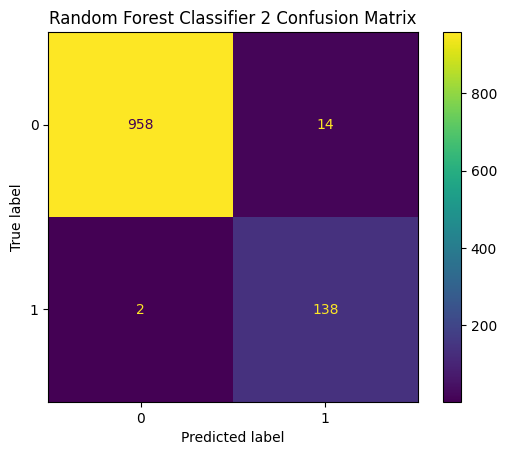

In [315]:
#confusion Matrix
plt.figure(figsize=(3,3))
cm=confusion_matrix(y_pred, y_test,labels=rf_cv.classes_)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_cv2.classes_)
disp.plot()
plt.title('Random Forest Classifier 2 Confusion Matrix')
plt.show()

In [309]:
# lets a data frame of results of all models

In [342]:
rf_cv_results2 = make_results('Random Forest CV2',rf_cv2 )
rf_cv_results2

,Model,F1,Recall,Precision,Accuracy
0,Random Forest CV2,0.948696,0.905541,0.996363,0.986952


final_result = pd.concat([final_results, rf_cv_results2])
final_result = final_result.sort_values(by='Accuracy', ascending=False)
final_result = final_result.reset_index(drop=True)
final_result

# My Analysis: Spam vs. Ham Classification - RF1 vs. RF2

## **Comparing RF1 and RF2**
I think that RF2 has performed better in terms of classification. Here's how they compare:

| Model | False Positives (FP) | False Negatives (FN) | Key Concern |
|--------|----------------------|----------------------|-------------|
| **RF1** | 21 | 15 | More spam misclassified as ham (15 FN) |
| **RF2** | 14 | 2 | Significantly fewer false negatives (only 2 FN) |

## **Why I Think RF2 is Better for Spam Detection?**
### **1. False Negatives (FN) Are More Costly in Spam Detection**
- FN = Spam emails mistakenly classified as ham.
- **RF1 has 15 FN**, meaning **15 spam emails went undetected**, which I think is quite risky.
- **RF2 has only 2 FN**, which is much better because fewer actual spam emails are missed.

### **2. False Positives (FP) Are Less Harmful**
- FP = Ham emails mistakenly classified as spam.
- **RF1 has 21 FP**, and **RF2 has 14 FP**.
- While it’s not ideal to misclassify ham as spam, I think it's less risky than allowing spam to go undetected.

## **Final Verdict:**
- **I believe RF2 is the better model** because it **drastically reduces false negatives** while keeping false positives manageable.
- In spam filtering, I think it’s **safer to block a ham email (FP) than to let spam through (FN)**.
- **Since RF2 minimizes the worst-case scenario (spam going undetected), I consider it the superior choice.** ✅

I feel confident that this analysis supports my conclusion!
